In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
len(session.query(Measurement).all())

19550

# Exploratory Precipitation Analysis

In [11]:
inspector = inspect(engine)

In [12]:
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Find the most recent date in the data set.
strDate = session.query(func.max(Measurement.date)).first()[0]
lastDate = dt.datetime.strptime(strDate, '%Y-%m-%d')
lastDate

datetime.datetime(2017, 8, 23, 0, 0)

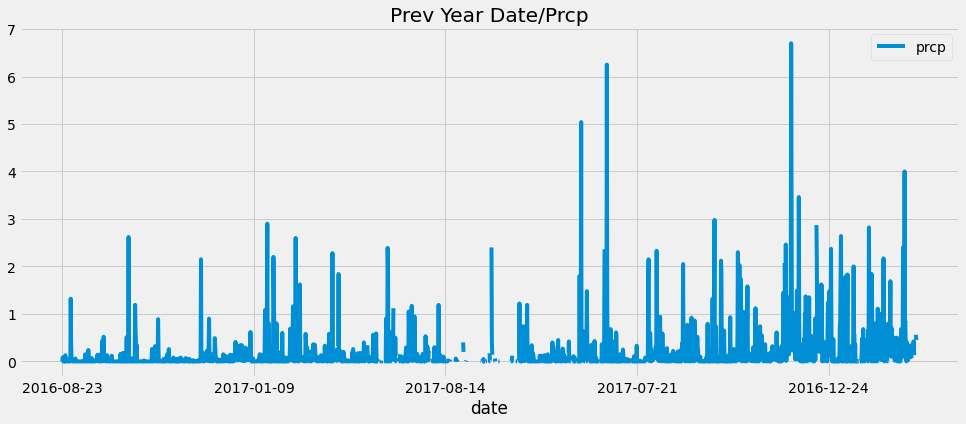

19550

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prevYear = lastDate - dt.timedelta(days=366)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= prevYear).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results,columns=['date','prcp']).set_index('date')


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=[15,6],title='Prev Year Date/Prcp')
plt.show()
len(session.query(Measurement).all())

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [20]:
session.query(Station).all()

In [21]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(Measurement.station,func.count(Measurement.id),func.\
                       min(Measurement.tobs),func.max(Measurement.tobs),\
                       func.avg(Measurement.tobs)).group_by(Measurement.station)\
        .order_by(func.count(Measurement.id).desc()).all()

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activedf = pd.DataFrame(active,columns=['station','activity',"min tmep",'max Temp','Avg Temp'])
activedf

,station,activity,min tmep,max Temp,Avg Temp
0,USC00519281,2772,54.0,85.0,71.663781
1,USC00519397,2724,56.0,87.0,74.553231
2,USC00513117,2709,59.0,85.0,72.689184
3,USC00519523,2669,56.0,85.0,74.543649
4,USC00516128,2612,58.0,84.0,70.915008
5,USC00514830,2202,58.0,85.0,74.873297
6,USC00511918,1979,53.0,87.0,71.615968
7,USC00517948,1372,58.0,87.0,74.684402
8,USC00518838,511,58.0,83.0,72.724070


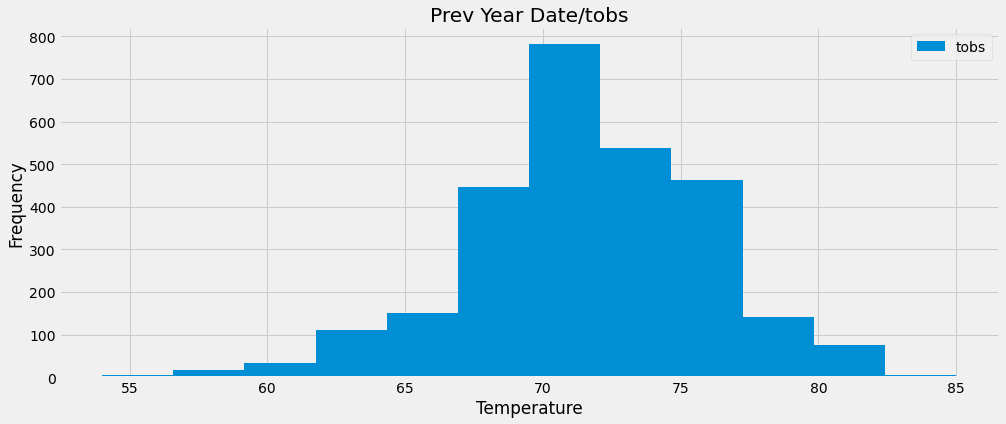

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
# and plot the results as a histogram
tobsresults = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
tobsdf = pd.DataFrame(tobsresults,columns=['date','tobs']).set_index('date')
tobsdf.plot.hist(figsize=[15,6],bins=12,title='Prev Year Date/tobs')
plt.xlabel('Temperature')
plt.show()

In [59]:
# activedf.describe()

,activity
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Close session

In [90]:
# Close Session
session.close()